In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv(r"C:\Users\kevin\Downloads\air_quality_data.csv")

In [69]:
data.head()

,City,Date,PM2.5,PM10,NO2,SO2,O3,AQI,AQI_Bucket
0,Delhi,2022-01-13,230.50,355.43,61.28,24.28,75.14,370.0,Very Poor
1,Delhi,2022-01-14,191.47,308.74,54.37,22.47,64.80,365.0,Very Poor
2,Delhi,2022-01-15,177.71,309.85,52.51,19.12,59.73,352.0,Very Poor
3,Delhi,2022-01-16,133.56,231.04,46.86,19.06,54.00,278.0,Poor
4,Delhi,2022-01-17,235.06,353.55,47.86,14.48,64.10,350.0,Very Poor


In [70]:
data['AQI_Bucket'].value_counts()

AQI_Bucket
Moderate        1369
Satisfactory    1128
Good             319
Poor             308
Very Poor        158
Severe            61
Name: count, dtype: int64

In [71]:
# Classification function
def classify_health_status(bucket):
    if bucket in ['Good', 'Satisfactory']:
        return 'Healthy'
    else:
        return 'Unhealthy'

# Apply classification
data['Health_Class'] = data['AQI_Bucket'].apply(classify_health_status)

In [72]:
data['Health_Class'].value_counts()

Health_Class
Unhealthy    1902
Healthy      1447
Name: count, dtype: int64

In [73]:
data.isna().sum()

City            0
Date            0
PM2.5           6
PM10            6
NO2             6
SO2             6
O3              6
AQI             6
AQI_Bucket      6
Health_Class    0
dtype: int64

In [74]:
data.shape

(3349, 10)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3349 entries, 0 to 3348
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          3349 non-null   object 
 1   Date          3349 non-null   object 
 2   PM2.5         3343 non-null   float64
 3   PM10          3343 non-null   float64
 4   NO2           3343 non-null   float64
 5   SO2           3343 non-null   float64
 6   O3            3343 non-null   float64
 7   AQI           3343 non-null   float64
 8   AQI_Bucket    3343 non-null   object 
 9   Health_Class  3349 non-null   object 
dtypes: float64(6), object(4)
memory usage: 261.8+ KB


In [76]:
data.duplicated().value_counts()

False    3349
Name: count, dtype: int64

In [77]:
num_dt = data.select_dtypes(include = "number")
cat_dt = data.select_dtypes(include = "object")

In [78]:
num_cols = num_dt.columns.to_list()
cat_cols = cat_dt.columns.to_list()

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>],
       [<Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'O3'}>, <Axes: title={'center': 'AQI'}>]],
      dtype=object)

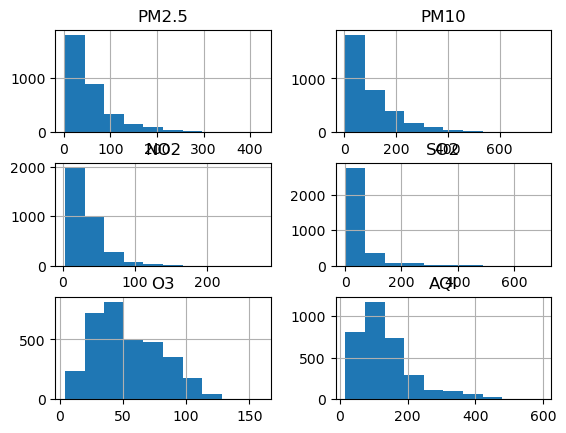

In [79]:
data.hist(num_cols)

In [80]:
print(data[num_cols].skew())

PM2.5    2.190540
PM10     1.855236
NO2      2.303288
SO2      3.308850
O3       0.520853
AQI      1.615790
dtype: float64


In [81]:
for col in num_dt.columns:
    if num_dt[col].skew() >= 0 and num_dt[col].skew() <= 0.5:
        num_dt[col] = num_dt[col].fillna(num_dt[col].mean())
    else:
        num_dt[col] = num_dt[col].fillna(num_dt[col].median())

In [82]:
for col in cat_dt.columns:
    cat_dt[col] = cat_dt[col].fillna(cat_dt[col].mode()[0]) 

In [83]:
data = pd.concat([num_dt, cat_dt], axis = 1)

In [84]:
data.select_dtypes(include = ['object']).columns.tolist()

['City', 'Date', 'AQI_Bucket', 'Health_Class']

In [85]:
data = data.drop(['City', 'Date', 'AQI_Bucket', 'Health_Class'], axis = 1)

In [86]:
data.shape

(3349, 6)

In [87]:
corr_matrix = data.corr()

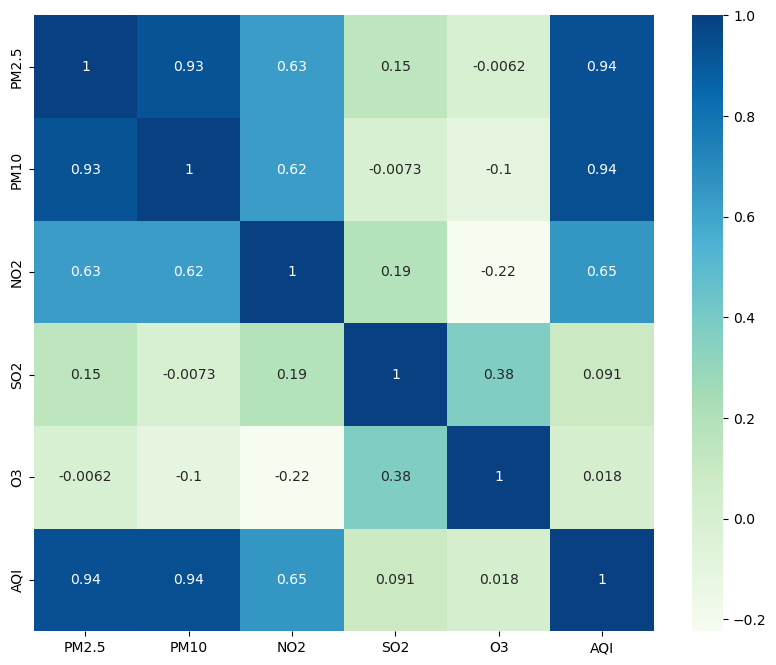

In [88]:
plt.subplots(figsize = (10,8))
sns.heatmap(corr_matrix, annot=True, cmap='GnBu')
plt.show()

In [89]:
data.columns

Index(['PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'AQI'], dtype='object')

In [90]:
result = {'Models:' : [],
          'MSE:' : [],
          'R2' : []
        }
result_dt = pd.DataFrame(result)
result_dt

,Models:,MSE:,R2


In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x = data.drop(['AQI'], axis = 1)
y = data['AQI']

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

In [94]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

pred1 = lr.predict(x_test)

In [95]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean_Squared_Error:', mean_squared_error(y_test, pred1))
print('R = Squared Value: ', r2_score(y_test, pred1) )

Mean_Squared_Error: 517.1987541376384
R = Squared Value:  0.931735886835057


In [96]:
result_dt.loc[len(result_dt)] = ["Linear Regression", mean_squared_error(y_test, pred1), r2_score(y_test, pred1)]

In [97]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

lr = LinearRegression()
lr.fit(x_train_poly, y_train)

pred2 = lr.predict(x_test_poly)

In [98]:
print('Mean_Squared_Error:', mean_squared_error(y_test, pred2))
print('R = Squared Value: ', r2_score(y_test, pred2) )

Mean_Squared_Error: 343.241751331252
R = Squared Value:  0.9546961519756982


In [99]:
result_dt.loc[len(result_dt)] = ["Polynomial Regression", mean_squared_error(y_test, pred2), r2_score(y_test, pred2)]

In [100]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

pred3 = rf_model.predict(x_test)

In [101]:
print('Mean_Squared_Error:', mean_squared_error(y_test, pred3))
print('R = Squared Value: ', r2_score(y_test, pred3) )

Mean_Squared_Error: 204.7776798170959
R = Squared Value:  0.972971770336151


In [102]:
result_dt.loc[len(result_dt)] = ["Random Forest Regressor", mean_squared_error(y_test, pred3), r2_score(y_test, pred3)]

In [103]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1) 

lasso.fit(x_train, y_train)
pred4 = lasso.predict(x_test)

In [104]:
print('Mean_Squared_Error:', mean_squared_error(y_test, pred4))
print('R = Squared Value: ', r2_score(y_test, pred4) )

Mean_Squared_Error: 517.2095911424973
R = Squared Value:  0.9317344564786996


In [105]:
result_dt.loc[len(result_dt)] = ["Lasso Regression", mean_squared_error(y_test, pred4), r2_score(y_test, pred4)]

In [106]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)

ridge.fit(x_train, y_train)
pred5 = ridge.predict(x_test)

In [107]:
print('Mean_Squared_Error:', mean_squared_error(y_test, pred5))
print('R = Squared Value: ', r2_score(y_test, pred5) )

Mean_Squared_Error: 517.1987708371038
R = Squared Value:  0.9317358846309254


In [108]:
result_dt.loc[len(result_dt)] = ["Ridge Regression", mean_squared_error(y_test, pred5), r2_score(y_test, pred5)]

In [109]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X1 = std_scaler.fit_transform(x)
X1 = pd.DataFrame(X1)

In [110]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y_train, y_test = train_test_split(X1,y,test_size = 0.25, random_state=42)

In [111]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x1_train, y_train)

y_pred1 = lr.predict(x1_test)

In [112]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean_Squared_Error:', mean_squared_error(y_test, y_pred1))
print('R = Squared Value: ', r2_score(y_test, y_pred1) )

Mean_Squared_Error: 517.198754137638
R = Squared Value:  0.9317358868350571


In [113]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range = (0,1))
X2 = min_max_scaler.fit_transform(x)
X2 = pd.DataFrame(X2)

from sklearn.model_selection import train_test_split
x2_train, x2_test, y_train, y_test = train_test_split(X2,y,test_size = 0.25, random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x2_train, y_train)

y_pred2 = lr.predict(x2_test)

In [114]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean_Squared_Error:', mean_squared_error(y_test, y_pred2))
print('R = Squared Value: ', r2_score(y_test, y_pred2) )

Mean_Squared_Error: 517.1987541376385
R = Squared Value:  0.931735886835057


In [115]:
from sklearn.preprocessing import normalize
X3 = normalize(x)
type(X3)
X3=pd.DataFrame(X3)

from sklearn.model_selection import train_test_split
x3_train, x3_test, y_train, y_test = train_test_split(X3,y,test_size = 0.25, random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x3_train, y_train)

y_pred3 = lr.predict(x3_test)

In [116]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean_Squared_Error:', mean_squared_error(y_test, y_pred3))
print('R = Squared Value: ', r2_score(y_test, y_pred3) )

Mean_Squared_Error: 2727.931965531015
R = Squared Value:  0.6399452726606587


In [117]:
result_dt

,Models:,MSE:,R2
0,Linear Regression,517.198754,0.931736
1,Polynomial Regression,343.241751,0.954696
2,Random Forest Regressor,204.777680,0.972972
3,Lasso Regression,517.209591,0.931734
4,Ridge Regression,517.198771,0.931736


In [ ]:
import pickle

# Save model to a file
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)